In [18]:
from PIL import Image #import Python Image Library
import numpy as np
import os
import glob
import re
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import mlutils
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plot the evolution of Loss and Acuracy on the train and validation sets
def plotevol():
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    return plt.show()

In [3]:
def show_preds(x, preds):
    for i  in np.random.permutation(range(len(preds)))[:4]:
        plt.figure(figsize=(5,2.5))
        plt.subplot(122)
        plt.imshow(x[i])
        plt.axis("off")
        plt.subplot(121)
        plt.bar(np.arange(2), preds[i], color="blue", alpha=.5, label="prediction")
        plt.bar(np.arange(2), np.eye(2,2)[int(y[i])], color="red", alpha=.5, label="label")
        plt.xticks(range(2), range(2), rotation="vertical");
        plt.xlim(-.5,1.5);
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, +1.35),ncol=5)

-Transfer learning: Alexnet conv1-2 - Architecture(U3.14:inceptionv3)
-Oclusión: máscaras para mostrar objetivo, etiquetado, image segmentation, mapa de calor

-Variaciones a la arquitectura: Archivo de experimentación: loss function, epocas, padding, activation, batch normalization: forma de estandarización de las imgs

-Matriz de confusión-Gráfica de confusión para una imagen U1.2
-Resultado: mlutils.lcurve: para mostrar desempeño en las diferentes épocas
-Textura

# Descarga de imágenes

In [11]:
#Bajar datos --Pendiente
!mkdir ImgsSat
!wget http://madm.dfki.de/files/sentinel/EuroSAT.zip -P ImgsSat
!unzip ImgsSat/EuroSAT.zip -d ImgsSat

--2019-04-11 07:05:26--  http://madm.dfki.de/files/sentinel/EuroSAT.zip
Resolving madm.dfki.de (madm.dfki.de)... 131.246.195.183
Connecting to madm.dfki.de (madm.dfki.de)|131.246.195.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94280567 (90M) [application/zip]
Saving to: ‘ImgsSat/EuroSAT.zip’

EuroSAT.zip         100%[===================>]  89.91M  12.3MB/s    in 17s     

2019-04-11 07:05:52 (5.43 MB/s) - ‘ImgsSat/EuroSAT.zip’ saved [94280567/94280567]

Archive:  ImgsSat/EuroSAT.zip
   creating: ImgsSat/2750/
   creating: ImgsSat/2750/River/
  inflating: ImgsSat/2750/River/River_479.jpg  
  inflating: ImgsSat/2750/River/River_2178.jpg  
  inflating: ImgsSat/2750/River/River_65.jpg  
  inflating: ImgsSat/2750/River/River_1643.jpg  
  inflating: ImgsSat/2750/River/River_191.jpg  
  inflating: ImgsSat/2750/River/River_636.jpg  
  inflating: ImgsSat/2750/River/River_2490.jpg  
  inflating: ImgsSat/2750/River/River_2337.jpg  
  inflating: ImgsSat/2750/River/

  inflating: ImgsSat/2750/River/River_1341.jpg  
  inflating: ImgsSat/2750/River/River_1894.jpg  
  inflating: ImgsSat/2750/River/River_334.jpg  
  inflating: ImgsSat/2750/River/River_493.jpg  
  inflating: ImgsSat/2750/River/River_2192.jpg  
  inflating: ImgsSat/2750/River/River_755.jpg  
  inflating: ImgsSat/2750/River/River_1720.jpg  
  inflating: ImgsSat/2750/River/River_1087.jpg  
  inflating: ImgsSat/2750/River/River_1056.jpg  
  inflating: ImgsSat/2750/River/River_784.jpg  
  inflating: ImgsSat/2750/River/River_2143.jpg  
  inflating: ImgsSat/2750/River/River_442.jpg  
  inflating: ImgsSat/2750/River/River_830.jpg  
  inflating: ImgsSat/2750/River/River_1390.jpg  
  inflating: ImgsSat/2750/River/River_1437.jpg  
  inflating: ImgsSat/2750/River/River_1845.jpg  
  inflating: ImgsSat/2750/River/River_2285.jpg  
  inflating: ImgsSat/2750/River/River_968.jpg  
  inflating: ImgsSat/2750/River/River_1219.jpg  
  inflating: ImgsSat/2750/River/River_1678.jpg  
  inflating: ImgsSat/2750/R

  inflating: ImgsSat/2750/River/River_1241.jpg  
  inflating: ImgsSat/2750/River/River_593.jpg  
  inflating: ImgsSat/2750/River/River_234.jpg  
  inflating: ImgsSat/2750/River/River_2354.jpg  
  inflating: ImgsSat/2750/River/River_1778.jpg  
  inflating: ImgsSat/2750/River/River_1319.jpg  
  inflating: ImgsSat/2750/River/River_868.jpg  
  inflating: ImgsSat/2750/River/River_2382.jpg  
  inflating: ImgsSat/2750/River/River_2425.jpg  
  inflating: ImgsSat/2750/River/River_1297.jpg  
  inflating: ImgsSat/2750/River/River_1942.jpg  
  inflating: ImgsSat/2750/River/River_1530.jpg  
  inflating: ImgsSat/2750/River/River_937.jpg  
  inflating: ImgsSat/2750/River/River_545.jpg  
  inflating: ImgsSat/2750/River/River_2044.jpg  
  inflating: ImgsSat/2750/River/River_683.jpg  
  inflating: ImgsSat/2750/River/River_124.jpg  
  inflating: ImgsSat/2750/River/River_1151.jpg  
  inflating: ImgsSat/2750/River/River_1627.jpg  
  inflating: ImgsSat/2750/River/River_1180.jpg  
  inflating: ImgsSat/2750/R

  inflating: ImgsSat/2750/River/River_693.jpg  
  inflating: ImgsSat/2750/River/River_134.jpg  
  inflating: ImgsSat/2750/River/River_1141.jpg  
  inflating: ImgsSat/2750/River/River_1876.jpg  
  inflating: ImgsSat/2750/River/River_1404.jpg  
  inflating: ImgsSat/2750/River/River_803.jpg  
  inflating: ImgsSat/2750/River/River_471.jpg  
  inflating: ImgsSat/2750/River/River_2170.jpg  
  inflating: ImgsSat/2750/River/River_1065.jpg  
  inflating: ImgsSat/2750/River/River_1713.jpg  
  inflating: ImgsSat/2750/River/River_766.jpg  
  inflating: ImgsSat/2750/River/River_307.jpg  
  inflating: ImgsSat/2750/River/River_1372.jpg  
  inflating: ImgsSat/2750/River/River_2267.jpg  
  inflating: ImgsSat/2750/River/River_199.jpg  
  inflating: ImgsSat/2750/River/River_2498.jpg  
  inflating: ImgsSat/2750/River/River_529.jpg  
  inflating: ImgsSat/2750/River/River_2449.jpg  
  inflating: ImgsSat/2750/River/River_148.jpg  
  inflating: ImgsSat/2750/River/River_2028.jpg  
  inflating: ImgsSat/2750/Riv

  inflating: ImgsSat/2750/River/River_318.jpg  
  inflating: ImgsSat/2750/River/River_2278.jpg  
  inflating: ImgsSat/2750/River/River_1869.jpg  
  inflating: ImgsSat/2750/River/River_1943.jpg  
  inflating: ImgsSat/2750/River/River_1531.jpg  
  inflating: ImgsSat/2750/River/River_1296.jpg  
  inflating: ImgsSat/2750/River/River_936.jpg  
  inflating: ImgsSat/2750/River/River_544.jpg  
  inflating: ImgsSat/2750/River/River_2424.jpg  
  inflating: ImgsSat/2750/River/River_2383.jpg  
  inflating: ImgsSat/2750/River/River_125.jpg  
  inflating: ImgsSat/2750/River/River_682.jpg  
  inflating: ImgsSat/2750/River/River_1150.jpg  
  inflating: ImgsSat/2750/River/River_2045.jpg  
  inflating: ImgsSat/2750/River/River_2094.jpg  
  inflating: ImgsSat/2750/River/River_1181.jpg  
  inflating: ImgsSat/2750/River/River_1626.jpg  
  inflating: ImgsSat/2750/River/River_653.jpg  
  inflating: ImgsSat/2750/River/River_2352.jpg  
  inflating: ImgsSat/2750/River/River_595.jpg  
  inflating: ImgsSat/2750/R

  inflating: ImgsSat/2750/River/River_427.jpg  
  inflating: ImgsSat/2750/River/River_855.jpg  
  inflating: ImgsSat/2750/River/River_1452.jpg  
  inflating: ImgsSat/2750/River/River_1820.jpg  
  inflating: ImgsSat/2750/River/River_2231.jpg  
  inflating: ImgsSat/2750/River/River_1324.jpg  
  inflating: ImgsSat/2750/River/River_1483.jpg  
  inflating: ImgsSat/2750/River/River_351.jpg  
  inflating: ImgsSat/2750/River/River_884.jpg  
  inflating: ImgsSat/2750/River/River_730.jpg  
  inflating: ImgsSat/2750/River/River_1745.jpg  
  inflating: ImgsSat/2750/River/River_2315.jpg  
  inflating: ImgsSat/2750/River/River_1200.jpg  
  inflating: ImgsSat/2750/River/River_275.jpg  
  inflating: ImgsSat/2750/River/River_614.jpg  
  inflating: ImgsSat/2750/River/River_1661.jpg  
  inflating: ImgsSat/2750/River/River_1117.jpg  
  inflating: ImgsSat/2750/River/River_162.jpg  
  inflating: ImgsSat/2750/River/River_2002.jpg  
  inflating: ImgsSat/2750/River/River_971.jpg  
  inflating: ImgsSat/2750/Riv

  inflating: ImgsSat/2750/River/River_2122.jpg  
  inflating: ImgsSat/2750/River/River_1037.jpg  
  inflating: ImgsSat/2750/River/River_1790.jpg  
  inflating: ImgsSat/2750/River/River_734.jpg  
  inflating: ImgsSat/2750/River/River_1741.jpg  
  inflating: ImgsSat/2750/River/River_1487.jpg  
  inflating: ImgsSat/2750/River/River_1320.jpg  
  inflating: ImgsSat/2750/River/River_880.jpg  
  inflating: ImgsSat/2750/River/River_355.jpg  
  inflating: ImgsSat/2750/River/River_2235.jpg  
  inflating: ImgsSat/2750/River/River_1509.jpg  
  inflating: ImgsSat/2750/River/River_1168.jpg  
  inflating: ImgsSat/2750/River/River_1823.jpg  
  inflating: ImgsSat/2750/River/River_1451.jpg  
  inflating: ImgsSat/2750/River/River_383.jpg  
  inflating: ImgsSat/2750/River/River_856.jpg  
  inflating: ImgsSat/2750/River/River_424.jpg  
  inflating: ImgsSat/2750/River/River_2125.jpg  
  inflating: ImgsSat/2750/River/River_1797.jpg  
  inflating: ImgsSat/2750/River/River_1030.jpg  
  inflating: ImgsSat/2750/

  inflating: ImgsSat/2750/River/River_2088.jpg  
  inflating: ImgsSat/2750/River/River_2059.jpg  
  inflating: ImgsSat/2750/River/River_139.jpg  
  inflating: ImgsSat/2750/River/River_2438.jpg  
  inflating: ImgsSat/2750/River/River_558.jpg  
  inflating: ImgsSat/2750/River/River_1068.jpg  
  inflating: ImgsSat/2750/River/River_1409.jpg  
  inflating: ImgsSat/2750/River/River_60.jpg  
  inflating: ImgsSat/2750/River/River_2495.jpg  
  inflating: ImgsSat/2750/River/River_2332.jpg  
  inflating: ImgsSat/2750/River/River_987.jpg  
  inflating: ImgsSat/2750/River/River_252.jpg  
  inflating: ImgsSat/2750/River/River_1580.jpg  
  inflating: ImgsSat/2750/River/River_1227.jpg  
  inflating: ImgsSat/2750/River/River_1646.jpg  
  inflating: ImgsSat/2750/River/River_194.jpg  
  inflating: ImgsSat/2750/River/River_633.jpg  
  inflating: ImgsSat/2750/River/River_145.jpg  
  inflating: ImgsSat/2750/River/River_1130.jpg  
  inflating: ImgsSat/2750/River/River_1697.jpg  
  inflating: ImgsSat/2750/Riv

  inflating: ImgsSat/2750/River/River_1237.jpg  
  inflating: ImgsSat/2750/River/River_1656.jpg  
  inflating: ImgsSat/2750/River/River_184.jpg  
  inflating: ImgsSat/2750/River/River_623.jpg  
  inflating: ImgsSat/2750/River/River_70.jpg  
  inflating: ImgsSat/2750/River/River_1078.jpg  
  inflating: ImgsSat/2750/River/River_1419.jpg  
  inflating: ImgsSat/2750/River/River_2100.jpg  
  inflating: ImgsSat/2750/River/River_1015.jpg  
  inflating: ImgsSat/2750/River/River_1474.jpg  
  inflating: ImgsSat/2750/River/River_1806.jpg  
  inflating: ImgsSat/2750/River/River_401.jpg  
  inflating: ImgsSat/2750/River/River_873.jpg  
  inflating: ImgsSat/2750/River/River_377.jpg  
  inflating: ImgsSat/2750/River/River_1302.jpg  
  inflating: ImgsSat/2750/River/River_2217.jpg  
  inflating: ImgsSat/2750/River/River_1763.jpg  
  inflating: ImgsSat/2750/River/River_716.jpg  
  inflating: ImgsSat/2750/River/River_588.jpg  
  inflating: ImgsSat/2750/River/River_2089.jpg  
  inflating: ImgsSat/2750/Riv

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1280.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1984.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1251.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2891.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2344.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1197.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1630.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_91.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_804.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_476.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2082.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2725.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1309.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_289.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1768.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_258.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2918.jpg  
  i

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1199.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1307.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_141.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2212.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1766.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_520.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_952.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2673.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_287.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_983.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2105.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_256.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1010.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_190.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2916.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2564.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_637.jpg  
  inf

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1726.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1081.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2633.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2194.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_912.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_560.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1347.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1892.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2252.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2987.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_101.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1602.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_444.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_836.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2717.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1263.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2376.jpg  
  

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1356.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1420.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1852.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1387.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2947.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2535.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_666.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2292.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1041.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2154.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_207.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1578.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1119.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_429.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2598.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2549.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2128.jpg  


  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_943.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_531.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1777.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1188.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_469.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1159.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1538.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2168.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2509.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2480.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2327.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1595.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1232.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_415.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_867.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2746.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1653.jpg  
  

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_720.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1107.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_894.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2012.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_341.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2959.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_678.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1399.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_219.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1729.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1348.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2988.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2718.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_839.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2379.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1968.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1830.jpg  
  i

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2268.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2609.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_928.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1879.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_308.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_48.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2848.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_769.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1288.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1259.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2899.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1638.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_99.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_147.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2214.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1301.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_954.jpg  
  infl

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_81.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2092.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_466.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_814.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2735.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2043.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_310.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_50.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1156.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2850.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2422.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_771.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2385.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1537.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1945.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1290.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_234.jpg  
  infl

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2906.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_180.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_627.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1813.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1461.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1317.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_151.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2202.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1776.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_942.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_530.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_297.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2663.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_468.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1189.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1158.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1539.jpg  
  in

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_667.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2946.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2534.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1386.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1421.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1853.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_206.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2155.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1040.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1579.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1118.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_428.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2599.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2548.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2129.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2410.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2862.jpg  


  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_82.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1184.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1623.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2882.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2357.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1997.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1242.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1946.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1534.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1293.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2421.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2853.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2386.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_772.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1155.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_53.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2040.jpg  
  

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_3.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1574.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1906.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_732.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2813.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2461.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2317.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1202.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_382.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2776.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_425.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_857.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1663.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_160.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2594.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2233.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1481.jpg  
  inf

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1735.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1092.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1043.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_205.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2156.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1385.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1850.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1422.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_664.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2290.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2537.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2945.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_888.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1908.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2319.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2778.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_859.jpg  
 

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2132.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2695.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_261.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1027.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1780.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2553.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2921.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_600.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1834.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1446.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1497.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1330.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_176.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2582.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2225.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1751.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_965.jpg  
 

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2210.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_143.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_635.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_192.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2566.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2914.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1801.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1473.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_254.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_981.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2107.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1012.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2830.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2442.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_711.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1557.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1925.jpg  
  i

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2538.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_887.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2001.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_352.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1114.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_12.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2812.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2460.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_733.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1575.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1907.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1203.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2316.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1662.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_424.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_856.jpg  
  infla

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_958.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2218.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1809.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_989.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1524.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1956.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1283.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2843.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2431.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_762.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2396.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1145.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_43.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2050.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_303.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2081.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_475.jpg  
  in

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_252.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2101.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_987.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2307.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1212.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2766.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_392.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_847.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_435.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1673.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1105.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_343.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_896.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2010.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1916.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1564.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_722.jpg  
  inf

  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_849.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_898.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1918.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1053.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_215.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2146.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1395.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1432.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1840.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2280.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_674.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2955.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2527.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2251.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_102.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_2984.jpg  
  inflating: ImgsSat/2750/AnnualCrop/AnnualCrop_1344.jpg  
  

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_376.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_717.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2578.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_872.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_400.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2119.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_145.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1549.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_524.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_956.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_283.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1128.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVeg

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1773.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2207.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1312.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1464.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1816.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2903.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2571.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1005.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_409.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2110.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2316.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1203.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbac

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1617.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1161.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2074.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1500.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1972.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2867.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2415.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_847.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_435.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_392.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1039.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1458.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceo

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_80.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1053.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_799.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2527.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2955.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2280.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1840.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1432.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1395.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_507.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_975.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1918.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceous

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1303.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2216.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2088.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_236.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_591.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_657.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2438.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_686.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_121.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_540.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_932.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2059.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVe

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_947.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_535.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2512.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2960.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1875.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1407.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2173.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_818.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1066.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1710.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_64.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2605.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceous

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2703.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2075.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1160.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2866.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2414.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1501.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1973.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1038.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_393.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_846.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_434.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1459.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceo

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_833.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2158.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2539.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_787.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_756.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2189.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_337.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_490.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_672.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_213.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1169.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_917.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVeg

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_711.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1819.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_406.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_874.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1874.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1406.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2513.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2961.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1067.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2172.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_819.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2604.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceou

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1012.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2107.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_368.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2671.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1764.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_10.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2210.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_709.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1305.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_230.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_597.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2729.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousV

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1055.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_86.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_459.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2140.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1434.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1846.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1393.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2953.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2521.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2286.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_973.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_501.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceous

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_241.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2758.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2789.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_537.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_945.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_290.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1928.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_156.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_468.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2171.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1064.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2962.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousV

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1802.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1470.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1306.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2213.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_13.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1767.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2672.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_652.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_233.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_594.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1198.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1149.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceous

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_21.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_359.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_3000.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2640.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1493.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1334.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2586.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2221.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_738.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2925.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2557.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1442.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceou

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2522.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2950.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2285.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1845.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1437.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1390.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2143.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_828.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_85.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1056.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_163.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2808.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceou

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_430.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_397.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2129.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_893.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_346.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_727.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2599.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2775.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1660.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2314.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1201.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1577.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceous

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2202.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1317.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2663.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1776.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1000.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2115.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1461.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1813.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2906.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2574.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1124.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1683.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herba

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1391.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1844.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1436.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2284.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2523.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2951.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_84.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1057.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2142.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_829.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_162.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2809.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceou

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_904.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_576.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_200.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2719.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2378.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_661.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2646.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_27.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1753.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2580.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2227.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1495.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousV

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2750.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1645.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1694.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1133.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2781.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2026.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_298.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1920.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1552.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2447.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2835.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1017.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbac

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1247.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1992.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2352.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2887.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1626.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1181.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2733.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2094.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_713.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_372.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1008.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_876.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceo

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_216.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_677.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2418.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_101.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_912.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_560.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2079.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2932.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2540.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1455.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1827.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_438.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousV

  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_92.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_43.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1737.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1090.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2622.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2185.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1356.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1883.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2243.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2996.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_1613.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/HerbaceousVegetation_2706.jpg  
  inflating: ImgsSat/2750/HerbaceousVegetation/Herbaceou

  inflating: ImgsSat/2750/Industrial/Industrial_712.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_405.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_877.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1234.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1593.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2321.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2486.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1655.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_928.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2036.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1684.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1123.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2457.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1930.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1542.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_374.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_715.jpg  
  i

  inflating: ImgsSat/2750/Industrial/Industrial_671.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_210.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1669.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_914.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_566.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1208.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_107.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1731.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1096.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_399.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2183.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1350.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1885.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2245.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2294.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1381.jpg  
  infl

  inflating: ImgsSat/2750/Industrial/Industrial_2226.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1333.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1494.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_505.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_977.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_164.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_87.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2408.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_56.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_612.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2069.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_273.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1439.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_736.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1058.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_357.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_882.jpg  
  inflati

  inflating: ImgsSat/2750/Industrial/Industrial_577.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_905.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1219.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_116.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_24.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_660.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_201.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1308.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_814.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_466.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1769.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_310.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_771.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1147.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_248.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2052.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1954.jpg  
  inflati

  inflating: ImgsSat/2750/Industrial/Industrial_2416.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1162.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2077.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_969.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1614.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2360.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1275.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_99.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_443.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_831.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_785.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2238.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1829.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_754.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_492.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_335.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_34.jpg  
  inflat

  inflating: ImgsSat/2750/Industrial/Industrial_2449.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2498.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_125.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_682.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_936.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_544.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_460.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_812.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_316.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1019.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_777.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1478.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2054.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1141.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2435.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2392.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1520.jpg  
  inf

  inflating: ImgsSat/2750/Industrial/Industrial_1989.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2349.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1719.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_416.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_864.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1378.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_701.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_360.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_659.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1556.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1924.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2443.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_238.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1137.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1690.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2022.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1641.jpg  
  i

  inflating: ImgsSat/2750/Industrial/Industrial_2403.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_327.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1028.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_480.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_746.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1449.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1498.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_797.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_451.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_823.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2372.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1267.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_168.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1606.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_509.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1170.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2065.jpg  
  inf

  inflating: ImgsSat/2750/Industrial/Industrial_963.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_511.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1480.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1327.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2232.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_449.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1746.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2125.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1030.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1797.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_498.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1823.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1451.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_260.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_601.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_45.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_177.jpg  
  infl

  inflating: ImgsSat/2750/Industrial/Industrial_2429.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_987.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_252.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2048.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1816.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1464.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2110.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1005.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1773.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1312.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2207.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_886.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_353.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2149.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_732.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2198.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_857.jpg  
  i

  inflating: ImgsSat/2750/Industrial/Industrial_112.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_573.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_901.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_205.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1919.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_20.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_664.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_321.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1789.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_486.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_740.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_791.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1339.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_825.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_457.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1758.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1261.jpg  
  inflatin

  inflating: ImgsSat/2750/Industrial/Industrial_1221.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_689.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1586.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2334.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2493.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_862.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_410.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1408.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_707.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1069.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_366.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2445.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1922.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1550.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2024.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1131.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1696.jpg  
  

  inflating: ImgsSat/2750/Industrial/Industrial_1382.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1425.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1857.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2297.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_261.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_600.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_44.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_95.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1279.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_176.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1618.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_517.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_965.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_2234.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1486.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_789.jpg  
  inflating: ImgsSat/2750/Industrial/Industrial_1321.jpg  
  infla

  inflating: ImgsSat/2750/Residential/Residential_2510.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2962.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1877.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1405.jpg  
  inflating: ImgsSat/2750/Residential/Residential_450.jpg  
  inflating: ImgsSat/2750/Residential/Residential_822.jpg  
  inflating: ImgsSat/2750/Residential/Residential_169.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2029.jpg  
  inflating: ImgsSat/2750/Residential/Residential_508.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2448.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2499.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1018.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1479.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2055.jpg  
  inflating: ImgsSat/2750/Residential/Residential_115.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1140.jpg  
  inflating: ImgsSat/2750/Res

  inflating: ImgsSat/2750/Residential/Residential_1333.jpg  
  inflating: ImgsSat/2750/Residential/Residential_366.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1494.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2226.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2581.jpg  
  inflating: ImgsSat/2750/Residential/Residential_599.jpg  
  inflating: ImgsSat/2750/Residential/Residential_548.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2408.jpg  
  inflating: ImgsSat/2750/Residential/Residential_129.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2069.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1439.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1058.jpg  
  inflating: ImgsSat/2750/Residential/Residential_96.jpg  
  inflating: ImgsSat/2750/Residential/Residential_47.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1089.jpg  
  inflating: ImgsSat/2750/Residential/Residential_623.jpg  
  inflating: ImgsSat/2750/Residen

  inflating: ImgsSat/2750/Residential/Residential_651.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2711.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1265.jpg  
  inflating: ImgsSat/2750/Residential/Residential_597.jpg  
  inflating: ImgsSat/2750/Residential/Residential_230.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2370.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2406.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2874.jpg  
  inflating: ImgsSat/2750/Residential/Residential_546.jpg  
  inflating: ImgsSat/2750/Residential/Residential_934.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1961.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1513.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2067.jpg  
  inflating: ImgsSat/2750/Residential/Residential_127.jpg  
  inflating: ImgsSat/2750/Residential/Residential_680.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1172.jpg  
  inflating: ImgsSat/2750/Resid

  inflating: ImgsSat/2750/Residential/Residential_408.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2129.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1905.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1577.jpg  
  inflating: ImgsSat/2750/Residential/Residential_285.jpg  
  inflating: ImgsSat/2750/Residential/Residential_522.jpg  
  inflating: ImgsSat/2750/Residential/Residential_950.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2462.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2810.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1116.jpg  
  inflating: ImgsSat/2750/Residential/Residential_143.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2003.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2775.jpg  
  inflating: ImgsSat/2750/Residential/Residential_635.jpg  
  inflating: ImgsSat/2750/Residential/Residential_192.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1660.jpg  
  inflating: ImgsSat/2750/Resid

  inflating: ImgsSat/2750/Residential/Residential_2167.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1861.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1413.jpg  
  inflating: ImgsSat/2750/Residential/Residential_446.jpg  
  inflating: ImgsSat/2750/Residential/Residential_834.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2506.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2974.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2270.jpg  
  inflating: ImgsSat/2750/Residential/Residential_330.jpg  
  inflating: ImgsSat/2750/Residential/Residential_497.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1365.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2611.jpg  
  inflating: ImgsSat/2750/Residential/Residential_751.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1704.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1838.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2699.jpg  
  inflating: ImgsSat/2750/Res

  inflating: ImgsSat/2750/Residential/Residential_416.jpg  
  inflating: ImgsSat/2750/Residential/Residential_864.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1831.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1443.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2556.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2924.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1785.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1022.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2690.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2137.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2641.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1754.jpg  
  inflating: ImgsSat/2750/Residential/Residential_701.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2220.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2587.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1335.jpg  
  inflating: ImgsSat/2750/R

  inflating: ImgsSat/2750/Residential/Residential_610.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2215.jpg  
  inflating: ImgsSat/2750/Residential/Residential_355.jpg  
  inflating: ImgsSat/2750/Residential/Residential_880.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1300.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2674.jpg  
  inflating: ImgsSat/2750/Residential/Residential_734.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1761.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1017.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2102.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1804.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1476.jpg  
  inflating: ImgsSat/2750/Residential/Residential_384.jpg  
  inflating: ImgsSat/2750/Residential/Residential_423.jpg  
  inflating: ImgsSat/2750/Residential/Residential_851.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2563.jpg  
  inflating: ImgsSat/2750/Resid

  inflating: ImgsSat/2750/Residential/Residential_2909.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1318.jpg  
  inflating: ImgsSat/2750/Residential/Residential_898.jpg  
  inflating: ImgsSat/2750/Residential/Residential_10.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1779.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2329.jpg  
  inflating: ImgsSat/2750/Residential/Residential_269.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2748.jpg  
  inflating: ImgsSat/2750/Residential/Residential_608.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2799.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1938.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2166.jpg  
  inflating: ImgsSat/2750/Residential/Residential_781.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1073.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2507.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2975.jpg  
  inflating: ImgsSat/2750/Resi

  inflating: ImgsSat/2750/Residential/Residential_722.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1777.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2662.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1232.jpg  
  inflating: ImgsSat/2750/Residential/Residential_267.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1595.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2327.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2480.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1653.jpg  
  inflating: ImgsSat/2750/Residential/Residential_606.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2746.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2797.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2030.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1682.jpg  
  inflating: ImgsSat/2750/Residential/Residential_170.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1125.jpg  
  inflating: ImgsSat/2750/Re

  inflating: ImgsSat/2750/Residential/Residential_1622.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2883.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2356.jpg  
  inflating: ImgsSat/2750/Residential/Residential_216.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1996.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1243.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1947.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1535.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1292.jpg  
  inflating: ImgsSat/2750/Residential/Residential_560.jpg  
  inflating: ImgsSat/2750/Residential/Residential_912.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2420.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2852.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2387.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1154.jpg  
  inflating: ImgsSat/2750/Residential/Residential_101.jpg  
  inflating: ImgsSat/2750/Re

  inflating: ImgsSat/2750/Residential/Residential_2812.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2460.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2316.jpg  
  inflating: ImgsSat/2750/Residential/Residential_983.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1203.jpg  
  inflating: ImgsSat/2750/Residential/Residential_256.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2777.jpg  
  inflating: ImgsSat/2750/Residential/Residential_190.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1662.jpg  
  inflating: ImgsSat/2750/Residential/Residential_637.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2188.jpg  
  inflating: ImgsSat/2750/Residential/Residential_53.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2159.jpg  
  inflating: ImgsSat/2750/Residential/Residential_82.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2538.jpg  
  inflating: ImgsSat/2750/Residential/Residential_478.jpg  
  inflating: ImgsSat/2750/Residen

  inflating: ImgsSat/2750/Residential/Residential_639.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2779.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2240.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2995.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1355.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1880.jpg  
  inflating: ImgsSat/2750/Residential/Residential_300.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2621.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2186.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1734.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1093.jpg  
  inflating: ImgsSat/2750/Residential/Residential_761.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1042.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2157.jpg  
  inflating: ImgsSat/2750/Residential/Residential_476.jpg  
  inflating: ImgsSat/2750/Residential/Residential_804.jpg  
  inflating: ImgsSat/2750/Res

  inflating: ImgsSat/2750/Residential/Residential_420.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2101.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1014.jpg  
  inflating: ImgsSat/2750/Residential/Residential_578.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2438.jpg  
  inflating: ImgsSat/2750/Residential/Residential_119.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2059.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2088.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1765.jpg  
  inflating: ImgsSat/2750/Residential/Residential_730.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2670.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1304.jpg  
  inflating: ImgsSat/2750/Residential/Residential_884.jpg  
  inflating: ImgsSat/2750/Residential/Residential_351.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2211.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2567.jpg  
  inflating: ImgsSat/2750/Resi

  inflating: ImgsSat/2750/Residential/Residential_661.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1193.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1634.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2086.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2721.jpg  
  inflating: ImgsSat/2750/Residential/Residential_200.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1980.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1255.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2895.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2340.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1908.jpg  
  inflating: ImgsSat/2750/Residential/Residential_288.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2319.jpg  
  inflating: ImgsSat/2750/Residential/Residential_259.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2778.jpg  
  inflating: ImgsSat/2750/Residential/Residential_638.jpg  
  inflating: ImgsSat/2750/Res

  inflating: ImgsSat/2750/Residential/Residential_1573.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1205.jpg  
  inflating: ImgsSat/2750/Residential/Residential_985.jpg  
  inflating: ImgsSat/2750/Residential/Residential_250.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2310.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1664.jpg  
  inflating: ImgsSat/2750/Residential/Residential_196.jpg  
  inflating: ImgsSat/2750/Residential/Residential_631.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2771.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2248.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1888.jpg  
  inflating: ImgsSat/2750/Residential/Residential_308.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2629.jpg  
  inflating: ImgsSat/2750/Residential/Residential_55.jpg  
  inflating: ImgsSat/2750/Residential/Residential_769.jpg  
  inflating: ImgsSat/2750/Residential/Residential_84.jpg  
  inflating: ImgsSat/2750/Resident

  inflating: ImgsSat/2750/Residential/Residential_2453.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2821.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1934.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1546.jpg  
  inflating: ImgsSat/2750/Residential/Residential_513.jpg  
  inflating: ImgsSat/2750/Residential/Residential_961.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2032.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2795.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1127.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1680.jpg  
  inflating: ImgsSat/2750/Residential/Residential_172.jpg  
  inflating: ImgsSat/2750/Residential/Residential_839.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2979.jpg  
  inflating: ImgsSat/2750/Residential/Residential_60.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1709.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1368.jpg  
  inflating: ImgsSat/2750/Resi

  inflating: ImgsSat/2750/Residential/Residential_2676.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1763.jpg  
  inflating: ImgsSat/2750/Residential/Residential_736.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2217.jpg  
  inflating: ImgsSat/2750/Residential/Residential_882.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1302.jpg  
  inflating: ImgsSat/2750/Residential/Residential_357.jpg  
  inflating: ImgsSat/2750/Residential/Residential_853.jpg  
  inflating: ImgsSat/2750/Residential/Residential_421.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1474.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1806.jpg  
  inflating: ImgsSat/2750/Residential/Residential_386.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2913.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2561.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1015.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2100.jpg  
  inflating: ImgsSat/2750/Resi

  inflating: ImgsSat/2750/Residential/Residential_2140.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1846.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1434.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1393.jpg  
  inflating: ImgsSat/2750/Residential/Residential_461.jpg  
  inflating: ImgsSat/2750/Residential/Residential_813.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2521.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2953.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2286.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2982.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2257.jpg  
  inflating: ImgsSat/2750/Residential/Residential_317.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1897.jpg  
  inflating: ImgsSat/2750/Residential/Residential_1342.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2191.jpg  
  inflating: ImgsSat/2750/Residential/Residential_2636.jpg  
  inflating: ImgsSat/2750/R

  inflating: ImgsSat/2750/Highway/Highway_2111.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1004.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1772.jpg  
  inflating: ImgsSat/2750/Highway/Highway_298.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1313.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2206.jpg  
  inflating: ImgsSat/2750/Highway/Highway_867.jpg  
  inflating: ImgsSat/2750/Highway/Highway_415.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1658.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1239.jpg  
  inflating: ImgsSat/2750/Highway/Highway_702.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1689.jpg  
  inflating: ImgsSat/2750/Highway/Highway_363.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1417.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1865.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2163.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1076.jpg  
  inflating: ImgsSat/2750/Highway/Highway_71.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1700.jpg  


  inflating: ImgsSat/2750/Highway/Highway_1611.jpg  
  inflating: ImgsSat/2750/Highway/Highway_165.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1328.jpg  
  inflating: ImgsSat/2750/Highway/Highway_504.jpg  
  inflating: ImgsSat/2750/Highway/Highway_976.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1749.jpg  
  inflating: ImgsSat/2750/Highway/Highway_38.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1798.jpg  
  inflating: ImgsSat/2750/Highway/Highway_272.jpg  
  inflating: ImgsSat/2750/Highway/Highway_613.jpg  
  inflating: ImgsSat/2750/Highway/Highway_358.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2000.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1115.jpg  
  inflating: ImgsSat/2750/Highway/Highway_739.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2461.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1906.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1574.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1202.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2317.jpg  
  

  inflating: ImgsSat/2750/Highway/Highway_1052.jpg  
  inflating: ImgsSat/2750/Highway/Highway_55.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2147.jpg  
  inflating: ImgsSat/2750/Highway/Highway_7.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1841.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1433.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1394.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2281.jpg  
  inflating: ImgsSat/2750/Highway/Highway_108.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2250.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1890.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1345.jpg  
  inflating: ImgsSat/2750/Highway/Highway_569.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2196.jpg  
  inflating: ImgsSat/2750/Highway/Highway_84.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1083.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1724.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2308.jpg  
  inflating: ImgsSat/2750/Highway/Highway_431.jpg  
  i

  inflating: ImgsSat/2750/Highway/Highway_2125.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1451.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1823.jpg  
  inflating: ImgsSat/2750/Highway/Highway_882.jpg  
  inflating: ImgsSat/2750/Highway/Highway_357.jpg  
  inflating: ImgsSat/2750/Highway/Highway_736.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1909.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2318.jpg  
  inflating: ImgsSat/2750/Highway/Highway_853.jpg  
  inflating: ImgsSat/2750/Highway/Highway_421.jpg  
  inflating: ImgsSat/2750/Highway/Highway_386.jpg  
  inflating: ImgsSat/2750/Highway/Highway_118.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2240.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1880.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1355.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2186.jpg  
  inflating: ImgsSat/2750/Highway/Highway_579.jpg  
  inflating: ImgsSat/2750/Highway/Highway_94.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1093.jpg  
  i

  inflating: ImgsSat/2750/Highway/Highway_246.jpg  
  inflating: ImgsSat/2750/Highway/Highway_530.jpg  
  inflating: ImgsSat/2750/Highway/Highway_942.jpg  
  inflating: ImgsSat/2750/Highway/Highway_297.jpg  
  inflating: ImgsSat/2750/Highway/Highway_151.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2209.jpg  
  inflating: ImgsSat/2750/Highway/Highway_868.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1657.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2323.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2484.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1236.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1591.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1932.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1540.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2455.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1686.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1121.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2034.jpg  
  inflating: ImgsSat/2750/Highway/Highway_655.jpg  


  inflating: ImgsSat/2750/Highway/Highway_477.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2088.jpg  
  inflating: ImgsSat/2750/Highway/Highway_805.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1710.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1371.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2264.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1875.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1407.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2173.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1066.jpg  
  inflating: ImgsSat/2750/Highway/Highway_61.jpg  
  inflating: ImgsSat/2750/Highway/Highway_712.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1699.jpg  
  inflating: ImgsSat/2750/Highway/Highway_373.jpg  
  inflating: ImgsSat/2750/Highway/Highway_405.jpg  
  inflating: ImgsSat/2750/Highway/Highway_877.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1648.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1229.jpg  
  inflating: ImgsSat/2750/Highway/Highway_286.jpg  
  

  inflating: ImgsSat/2750/Highway/Highway_1260.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2375.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1601.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2062.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1177.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2403.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1516.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1964.jpg  
  inflating: ImgsSat/2750/Highway/Highway_8.jpg  
  inflating: ImgsSat/2750/Highway/Highway_210.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2148.jpg  
  inflating: ImgsSat/2750/Highway/Highway_671.jpg  
  inflating: ImgsSat/2750/Highway/Highway_107.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2199.jpg  
  inflating: ImgsSat/2750/Highway/Highway_914.jpg  
  inflating: ImgsSat/2750/Highway/Highway_566.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1212.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2307.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1673.jpg  
 

  inflating: ImgsSat/2750/Highway/Highway_957.jpg  
  inflating: ImgsSat/2750/Highway/Highway_525.jpg  
  inflating: ImgsSat/2750/Highway/Highway_282.jpg  
  inflating: ImgsSat/2750/Highway/Highway_986.jpg  
  inflating: ImgsSat/2750/Highway/Highway_253.jpg  
  inflating: ImgsSat/2750/Highway/Highway_19.jpg  
  inflating: ImgsSat/2750/Highway/Highway_195.jpg  
  inflating: ImgsSat/2750/Highway/Highway_632.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1146.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2053.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1527.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1955.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1280.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2432.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2395.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2344.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1984.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1251.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2082.jpg  
  

  inflating: ImgsSat/2750/Highway/Highway_723.jpg  
  inflating: ImgsSat/2750/Highway/Highway_897.jpg  
  inflating: ImgsSat/2750/Highway/Highway_342.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1836.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1444.jpg  
  inflating: ImgsSat/2750/Highway/Highway_609.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1782.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1025.jpg  
  inflating: ImgsSat/2750/Highway/Highway_22.jpg  
  inflating: ImgsSat/2750/Highway/Highway_268.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2130.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1753.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2227.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1332.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1495.jpg  
  inflating: ImgsSat/2750/Highway/Highway_446.jpg  
  inflating: ImgsSat/2750/Highway/Highway_834.jpg  
  inflating: ImgsSat/2750/Highway/Highway_780.jpg  
  inflating: ImgsSat/2750/Highway/Highway_751.jpg  
  in

  inflating: ImgsSat/2750/Highway/Highway_488.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1162.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1614.jpg  
  inflating: ImgsSat/2750/Highway/Highway_459.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1275.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2360.jpg  
  inflating: ImgsSat/2750/Highway/Highway_501.jpg  
  inflating: ImgsSat/2750/Highway/Highway_973.jpg  
  inflating: ImgsSat/2750/Highway/Highway_160.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2238.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1829.jpg  
  inflating: ImgsSat/2750/Highway/Highway_616.jpg  
  inflating: ImgsSat/2750/Highway/Highway_277.jpg  
  inflating: ImgsSat/2750/Highway/Highway_732.jpg  
  inflating: ImgsSat/2750/Highway/Highway_353.jpg  
  inflating: ImgsSat/2750/Highway/Highway_886.jpg  
  inflating: ImgsSat/2750/Highway/Highway_382.jpg  
  inflating: ImgsSat/2750/Highway/Highway_857.jpg  
  inflating: ImgsSat/2750/Highway/Highway_425.jpg  
  infl

  inflating: ImgsSat/2750/Highway/Highway_2228.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1604.jpg  
  inflating: ImgsSat/2750/Highway/Highway_449.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1265.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2370.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2406.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1513.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1961.jpg  
  inflating: ImgsSat/2750/Highway/Highway_498.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2067.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1172.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2285.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1390.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1845.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1437.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2143.jpg  
  inflating: ImgsSat/2750/Highway/Highway_3.jpg  
  inflating: ImgsSat/2750/Highway/Highway_51.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1056.jpg  


  inflating: ImgsSat/2750/Highway/Highway_1537.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1290.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2422.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2385.jpg  
  inflating: ImgsSat/2750/Highway/Highway_996.jpg  
  inflating: ImgsSat/2750/Highway/Highway_243.jpg  
  inflating: ImgsSat/2750/Highway/Highway_185.jpg  
  inflating: ImgsSat/2750/Highway/Highway_622.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1319.jpg  
  inflating: ImgsSat/2750/Highway/Highway_154.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1778.jpg  
  inflating: ImgsSat/2750/Highway/Highway_535.jpg  
  inflating: ImgsSat/2750/Highway/Highway_947.jpg  
  inflating: ImgsSat/2750/Highway/Highway_292.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2328.jpg  
  inflating: ImgsSat/2750/Highway/Highway_863.jpg  
  inflating: ImgsSat/2750/Highway/Highway_411.jpg  
  inflating: ImgsSat/2750/Highway/Highway_367.jpg  
  inflating: ImgsSat/2750/Highway/Highway_706.jpg  
  inf

  inflating: ImgsSat/2750/Highway/Highway_824.jpg  
  inflating: ImgsSat/2750/Highway/Highway_456.jpg  
  inflating: ImgsSat/2750/Highway/Highway_790.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1743.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2237.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1322.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1485.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1454.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1826.jpg  
  inflating: ImgsSat/2750/Highway/Highway_619.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1792.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1035.jpg  
  inflating: ImgsSat/2750/Highway/Highway_32.jpg  
  inflating: ImgsSat/2750/Highway/Highway_278.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2120.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1902.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1570.jpg  
  inflating: ImgsSat/2750/Highway/Highway_2465.jpg  
  inflating: ImgsSat/2750/Highway/Highway_1111.jpg  


  inflating: ImgsSat/2750/Pasture/Pasture_1075.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_442.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_830.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1414.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1866.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_71.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1018.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_388.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1479.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_359.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_738.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_201.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1257.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1982.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_660.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1636.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1191.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1140.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_116.jpg  
  i

  inflating: ImgsSat/2750/Pasture/Pasture_319.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1439.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_31.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1058.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1913.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1561.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_945.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_537.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_290.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1100.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_156.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_187.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_620.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1676.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_994.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_241.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1217.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_704.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1752.jpg  
  inf

  inflating: ImgsSat/2750/Pasture/Pasture_1936.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_512.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_960.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_264.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1232.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1595.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_605.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1653.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_14.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_838.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1159.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1538.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_218.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1188.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_679.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_895.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_340.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1316.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_721.jpg  
  inf

  inflating: ImgsSat/2750/Pasture/Pasture_387.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1804.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1476.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1300.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_883.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_356.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1761.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_737.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1258.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1639.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_119.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1289.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_578.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1878.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1224.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1583.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_272.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1645.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_613.jpg  
 

  inflating: ImgsSat/2750/Pasture/Pasture_686.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_121.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1964.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1516.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_932.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_540.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_236.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_591.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1260.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_657.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1601.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_312.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1891.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1344.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_773.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1082.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1725.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1053.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1432.jpg  
  

  inflating: ImgsSat/2750/Pasture/Pasture_1523.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1284.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_907.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_575.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1142.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_114.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1407.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1875.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_451.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_823.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1066.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_797.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_746.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1710.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_327.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_480.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1371.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1648.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1229.jpg  
  

  inflating: ImgsSat/2750/Pasture/Pasture_1708.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_498.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1369.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_449.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_17.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1949.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1998.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1774.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_722.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1315.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_896.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_343.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_435.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_847.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_392.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1463.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1811.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1002.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1204.jpg  
  i

  inflating: ImgsSat/2750/Pasture/Pasture_279.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1588.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1559.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1138.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_859.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_75.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_888.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1195.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1632.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_664.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1986.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1253.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_205.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_573.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_901.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1525.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1957.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1282.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_112.jpg  
  i

  inflating: ImgsSat/2750/Pasture/Pasture_239.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_658.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_35.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_819.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_152.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1104.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_294.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_941.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_533.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1917.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1565.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1213.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_245.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_990.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1672.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_624.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_183.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1339.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_96.jpg  
  inflat

  inflating: ImgsSat/2750/Pasture/Pasture_370.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1326.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1481.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_89.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_711.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1747.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_981.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_254.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1202.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_192.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_635.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1663.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1115.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_143.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_2000.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1574.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1906.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_522.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_950.jpg  
  in

  inflating: ImgsSat/2750/Pasture/Pasture_834.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1071.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_780.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_18.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1293.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1946.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1534.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_910.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_562.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1155.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_103.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_675.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1623.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1184.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_214.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1242.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_1997.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_899.jpg  
  inflating: ImgsSat/2750/Pasture/Pasture_848.jpg  
  in

  inflating: ImgsSat/2750/Forest/Forest_822.jpg  
  inflating: ImgsSat/2750/Forest/Forest_450.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2589.jpg  
  inflating: ImgsSat/2750/Forest/Forest_796.jpg  
  inflating: ImgsSat/2750/Forest/Forest_747.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2558.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2139.jpg  
  inflating: ImgsSat/2750/Forest/Forest_481.jpg  
  inflating: ImgsSat/2750/Forest/Forest_326.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2400.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2872.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1967.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1515.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2061.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1174.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1602.jpg  
  inflating: ImgsSat/2750/Forest/Forest_508.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2717.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1263.jpg  
  inflating: ImgsSat/2750/Forest/Fores

  inflating: ImgsSat/2750/Forest/Forest_2105.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1010.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2564.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2916.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1803.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1471.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1307.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2212.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1766.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2673.jpg  
  inflating: ImgsSat/2750/Forest/Forest_155.jpg  
  inflating: ImgsSat/2750/Forest/Forest_21.jpg  
  inflating: ImgsSat/2750/Forest/Forest_946.jpg  
  inflating: ImgsSat/2750/Forest/Forest_534.jpg  
  inflating: ImgsSat/2750/Forest/Forest_293.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1199.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1148.jpg  
  inflating: ImgsSat/2750/Forest/Forest_997.jpg  
  inflating: ImgsSat/2750/Forest/Forest_242.jpg  
  inflating: ImgsSat/2750/Forest/Forest

  inflating: ImgsSat/2750/Forest/Forest_1812.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2907.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2575.jpg  
  inflating: ImgsSat/2750/Forest/Forest_586.jpg  
  inflating: ImgsSat/2750/Forest/Forest_221.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2799.jpg  
  inflating: ImgsSat/2750/Forest/Forest_640.jpg  
  inflating: ImgsSat/2750/Forest/Forest_93.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1938.jpg  
  inflating: ImgsSat/2750/Forest/Forest_42.jpg  
  inflating: ImgsSat/2750/Forest/Forest_136.jpg  
  inflating: ImgsSat/2750/Forest/Forest_691.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2329.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2748.jpg  
  inflating: ImgsSat/2750/Forest/Forest_557.jpg  
  inflating: ImgsSat/2750/Forest/Forest_925.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2271.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1364.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2610.jpg  
  inflating: ImgsSat/2750/Forest/Forest_17

  inflating: ImgsSat/2750/Forest/Forest_1097.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1730.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2991.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2244.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1884.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1351.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2701.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1614.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2360.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1275.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1971.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1503.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2416.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2864.jpg  
  inflating: ImgsSat/2750/Forest/Forest_609.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1162.jpg  
  inflating: ImgsSat/2750/Forest/Forest_268.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2077.jpg  
  inflating: ImgsSat/2750/Forest/Forest_751.jpg  
  inflating: ImgsSat/2750/Forest/F

  inflating: ImgsSat/2750/Forest/Forest_1553.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2446.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2834.jpg  
  inflating: ImgsSat/2750/Forest/Forest_659.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2178.jpg  
  inflating: ImgsSat/2750/Forest/Forest_367.jpg  
  inflating: ImgsSat/2750/Forest/Forest_3.jpg  
  inflating: ImgsSat/2750/Forest/Forest_706.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2519.jpg  
  inflating: ImgsSat/2750/Forest/Forest_411.jpg  
  inflating: ImgsSat/2750/Forest/Forest_863.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2337.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2490.jpg  
  inflating: ImgsSat/2750/Forest/Forest_128.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1222.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1585.jpg  
  inflating: ImgsSat/2750/Forest/Forest_549.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2756.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1643.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1

  inflating: ImgsSat/2750/Forest/Forest_1603.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2377.jpg  
  inflating: ImgsSat/2750/Forest/Forest_168.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1262.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2632.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2195.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1727.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1080.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2253.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2986.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1346.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1893.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1397.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1430.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1842.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2282.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2957.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2525.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1051.jpg  
  inflating: ImgsSat/2750/Forest

  inflating: ImgsSat/2750/Forest/Forest_2801.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1107.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2012.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2764.jpg  
  inflating: ImgsSat/2750/Forest/Forest_909.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1671.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2305.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1210.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2709.jpg  
  inflating: ImgsSat/2750/Forest/Forest_964.jpg  
  inflating: ImgsSat/2750/Forest/Forest_516.jpg  
  inflating: ImgsSat/2750/Forest/Forest_177.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2368.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1979.jpg  
  inflating: ImgsSat/2750/Forest/Forest_601.jpg  
  inflating: ImgsSat/2750/Forest/Forest_260.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2546.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2934.jpg  
  inflating: ImgsSat/2750/Forest/Forest_759.jpg  
  inflating: ImgsSat/2750/Forest/Fores

  inflating: ImgsSat/2750/Forest/Forest_491.jpg  
  inflating: ImgsSat/2750/Forest/Forest_336.jpg  
  inflating: ImgsSat/2750/Forest/Forest_440.jpg  
  inflating: ImgsSat/2750/Forest/Forest_832.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2599.jpg  
  inflating: ImgsSat/2750/Forest/Forest_786.jpg  
  inflating: ImgsSat/2750/Forest/Forest_916.jpg  
  inflating: ImgsSat/2750/Forest/Forest_564.jpg  
  inflating: ImgsSat/2750/Forest/Forest_105.jpg  
  inflating: ImgsSat/2750/Forest/Forest_71.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1579.jpg  
  inflating: ImgsSat/2750/Forest/Forest_673.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1118.jpg  
  inflating: ImgsSat/2750/Forest/Forest_212.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2534.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2946.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2293.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1853.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1421.jpg  
  inflating: ImgsSat/2750/Forest/Forest_138

  inflating: ImgsSat/2750/Forest/Forest_1776.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2663.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2115.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1000.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2906.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2574.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1461.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1813.jpg  
  inflating: ImgsSat/2750/Forest/Forest_255.jpg  
  inflating: ImgsSat/2750/Forest/Forest_980.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1299.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2859.jpg  
  inflating: ImgsSat/2750/Forest/Forest_634.jpg  
  inflating: ImgsSat/2750/Forest/Forest_193.jpg  
  inflating: ImgsSat/2750/Forest/Forest_142.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2888.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1248.jpg  
  inflating: ImgsSat/2750/Forest/Forest_36.jpg  
  inflating: ImgsSat/2750/Forest/Forest_284.jpg  
  inflating: ImgsSat/2750/Forest/Forest

  inflating: ImgsSat/2750/Forest/Forest_1749.jpg  
  inflating: ImgsSat/2750/Forest/Forest_831.jpg  
  inflating: ImgsSat/2750/Forest/Forest_443.jpg  
  inflating: ImgsSat/2750/Forest/Forest_72.jpg  
  inflating: ImgsSat/2750/Forest/Forest_106.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2319.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2778.jpg  
  inflating: ImgsSat/2750/Forest/Forest_567.jpg  
  inflating: ImgsSat/2750/Forest/Forest_915.jpg  
  inflating: ImgsSat/2750/Forest/Forest_211.jpg  
  inflating: ImgsSat/2750/Forest/Forest_670.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1908.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1043.jpg  
  inflating: ImgsSat/2750/Forest/Forest_349.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2156.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1422.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1850.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1385.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2945.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2

  inflating: ImgsSat/2750/Forest/Forest_878.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1700.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2274.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1361.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1417.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1865.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2970.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2502.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1076.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2163.jpg  
  inflating: ImgsSat/2750/Forest/Forest_637.jpg  
  inflating: ImgsSat/2750/Forest/Forest_190.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2428.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2049.jpg  
  inflating: ImgsSat/2750/Forest/Forest_256.jpg  
  inflating: ImgsSat/2750/Forest/Forest_983.jpg  
  inflating: ImgsSat/2750/Forest/Forest_287.jpg  
  inflating: ImgsSat/2750/Forest/Forest_520.jpg  
  inflating: ImgsSat/2750/Forest/Forest_952.jpg  
  inflating: ImgsSat/2750/Forest/Forest

  inflating: ImgsSat/2750/Forest/Forest_2089.jpg  
  inflating: ImgsSat/2750/Forest/Forest_150.jpg  
  inflating: ImgsSat/2750/Forest/Forest_24.jpg  
  inflating: ImgsSat/2750/Forest/Forest_181.jpg  
  inflating: ImgsSat/2750/Forest/Forest_626.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2439.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2058.jpg  
  inflating: ImgsSat/2750/Forest/Forest_992.jpg  
  inflating: ImgsSat/2750/Forest/Forest_247.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1408.jpg  
  inflating: ImgsSat/2750/Forest/Forest_702.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1069.jpg  
  inflating: ImgsSat/2750/Forest/Forest_363.jpg  
  inflating: ImgsSat/2750/Forest/Forest_7.jpg  
  inflating: ImgsSat/2750/Forest/Forest_415.jpg  
  inflating: ImgsSat/2750/Forest/Forest_867.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1647.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2752.jpg  
  inflating: ImgsSat/2750/Forest/Forest_58.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1581.jp

  inflating: ImgsSat/2750/Forest/Forest_1171.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2405.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2877.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1962.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1510.jpg  
  inflating: ImgsSat/2750/Forest/Forest_18.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1266.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2373.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1607.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2712.jpg  
  inflating: ImgsSat/2750/Forest/Forest_794.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1339.jpg  
  inflating: ImgsSat/2750/Forest/Forest_452.jpg  
  inflating: ImgsSat/2750/Forest/Forest_820.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1758.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1789.jpg  
  inflating: ImgsSat/2750/Forest/Forest_324.jpg  
  inflating: ImgsSat/2750/Forest/Forest_483.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2928.jpg  
  inflating: ImgsSat/2750/Forest/Fores

  inflating: ImgsSat/2750/Forest/Forest_2324.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2483.jpg  
  inflating: ImgsSat/2750/Forest/Forest_402.jpg  
  inflating: ImgsSat/2750/Forest/Forest_870.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1708.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1369.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2978.jpg  
  inflating: ImgsSat/2750/Forest/Forest_715.jpg  
  inflating: ImgsSat/2750/Forest/Forest_374.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1949.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2389.jpg  
  inflating: ImgsSat/2750/Forest/Forest_631.jpg  
  inflating: ImgsSat/2750/Forest/Forest_196.jpg  
  inflating: ImgsSat/2750/Forest/Forest_250.jpg  
  inflating: ImgsSat/2750/Forest/Forest_985.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2739.jpg  
  inflating: ImgsSat/2750/Forest/Forest_281.jpg  
  inflating: ImgsSat/2750/Forest/Forest_954.jpg  
  inflating: ImgsSat/2750/Forest/Forest_526.jpg  
  inflating: ImgsSat/2750/Forest/Forest_14

  inflating: ImgsSat/2750/Forest/Forest_528.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2090.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2737.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1996.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1243.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2883.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2356.jpg  
  inflating: ImgsSat/2750/Forest/Forest_149.jpg  
  inflating: ImgsSat/2750/Forest/Forest_470.jpg  
  inflating: ImgsSat/2750/Forest/Forest_802.jpg  
  inflating: ImgsSat/2750/Forest/Forest_767.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2578.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2119.jpg  
  inflating: ImgsSat/2750/Forest/Forest_306.jpg  
  inflating: ImgsSat/2750/Forest/Forest_100.jpg  
  inflating: ImgsSat/2750/Forest/Forest_74.jpg  
  inflating: ImgsSat/2750/Forest/Forest_913.jpg  
  inflating: ImgsSat/2750/Forest/Forest_561.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2008.jpg  
  inflating: ImgsSat/2750/Forest/Forest_21

  inflating: ImgsSat/2750/Forest/Forest_720.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2249.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1889.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2628.jpg  
  inflating: ImgsSat/2750/Forest/Forest_390.jpg  
  inflating: ImgsSat/2750/Forest/Forest_437.jpg  
  inflating: ImgsSat/2750/Forest/Forest_845.jpg  
  inflating: ImgsSat/2750/Forest/Forest_172.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1278.jpg  
  inflating: ImgsSat/2750/Forest/Forest_961.jpg  
  inflating: ImgsSat/2750/Forest/Forest_513.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1619.jpg  
  inflating: ImgsSat/2750/Forest/Forest_265.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2869.jpg  
  inflating: ImgsSat/2750/Forest/Forest_604.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2685.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2122.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1790.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1037.jpg  
  inflating: ImgsSat/2750/Forest/Forest_

  inflating: ImgsSat/2750/Forest/Forest_116.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2309.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2768.jpg  
  inflating: ImgsSat/2750/Forest/Forest_905.jpg  
  inflating: ImgsSat/2750/Forest/Forest_577.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2256.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2983.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1343.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1896.jpg  
  inflating: ImgsSat/2750/Forest/Forest_428.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2637.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2190.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1722.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1085.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1054.jpg  
  inflating: ImgsSat/2750/Forest/Forest_2141.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1392.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1435.jpg  
  inflating: ImgsSat/2750/Forest/Forest_1847.jpg  
  inflating: ImgsSat/2750/Forest/Fo

  inflating: ImgsSat/2750/SeaLake/SeaLake_1789.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_4.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_298.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2928.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2063.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1176.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2870.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2402.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1517.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1965.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_815.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_467.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_311.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1261.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2374.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_72.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1600.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_770.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2715.jpg  
  i

  inflating: ImgsSat/2750/SeaLake/SeaLake_1069.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_119.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_737.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1647.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2752.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1581.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1226.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_883.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_356.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_35.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2494.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2333.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2837.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2445.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_852.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_420.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_387.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1550.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1922.jpg  
  

  inflating: ImgsSat/2750/SeaLake/SeaLake_2357.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2882.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1242.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1997.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_332.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_495.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2579.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2118.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_438.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1548.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1129.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1599.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2612.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_677.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1707.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2273.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1366.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_216.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_560.jpg  

  inflating: ImgsSat/2750/SeaLake/SeaLake_1277.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_307.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2703.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_766.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1616.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1160.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2075.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_803.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_471.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1501.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1973.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2866.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2414.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1038.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_148.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_529.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1459.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1488.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_199.jpg  


  inflating: ImgsSat/2750/SeaLake/SeaLake_1551.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1923.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2836.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2444.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1697.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1130.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2782.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2025.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_505.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_977.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1807.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1475.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2560.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2912.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1014.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_164.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2101.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2677.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_612.jpg

  inflating: ImgsSat/2750/SeaLake/SeaLake_1440.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2555.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2927.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1179.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_468.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1518.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2984.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2251.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_593.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_234.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1891.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1344.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2197.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2630.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1082.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1725.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_655.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_123.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_684.jpg  

  inflating: ImgsSat/2750/SeaLake/SeaLake_1042.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2291.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2944.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2536.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1384.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1423.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1851.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_921.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_553.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_225.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_582.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1355.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1880.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2240.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2995.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1734.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1093.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_644.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2621.jpg 

  inflating: ImgsSat/2750/SeaLake/SeaLake_1547.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1935.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_390.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_845.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_437.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2794.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2033.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1681.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1126.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1650.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_720.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2745.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_341.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_894.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1231.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1596.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2324.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2483.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_22.jpg  
 

  inflating: ImgsSat/2750/SeaLake/SeaLake_1863.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1411.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2165.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1070.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_100.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_408.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1578.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1119.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_550.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_922.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1387.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1852.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1420.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2292.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2535.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2947.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1041.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_696.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_131.jpg  

  inflating: ImgsSat/2750/SeaLake/SeaLake_1117.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2002.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2949.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1389.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_698.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1739.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_649.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_228.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1358.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2998.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2708.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2369.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1978.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_808.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1820.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1452.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_522.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_950.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_285.jpg  


  inflating: ImgsSat/2750/SeaLake/SeaLake_1938.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_848.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_899.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2329.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2748.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2271.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_214.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1364.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2610.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1705.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_675.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_103.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1073.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2166.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1412.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1860.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_910.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_562.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2975.jpg  


  inflating: ImgsSat/2750/SeaLake/SeaLake_2338.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_888.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2759.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2788.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1929.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_859.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2105.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1010.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_160.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2564.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2916.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_501.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_973.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1803.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1471.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1307.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_277.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2212.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_616.jpg  


  inflating: ImgsSat/2750/SeaLake/SeaLake_534.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_946.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_293.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1836.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1444.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2130.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2697.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1025.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1782.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_155.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2409.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2068.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_79.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1088.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_599.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_548.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1438.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1059.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_129.jpg  
  

  inflating: ImgsSat/2750/SeaLake/SeaLake_1530.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1942.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1297.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1993.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1246.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_491.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_336.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_55.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2886.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2353.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_757.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1180.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1627.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2095.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2732.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1009.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_179.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_518.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1468.jpg  


  inflating: ImgsSat/2750/SeaLake/SeaLake_1466.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_516.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_964.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1660.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_710.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2775.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_371.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1201.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2314.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_12.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2810.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2462.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1577.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1905.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_875.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_407.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2003.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1116.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1388.jpg  
 

  inflating: ImgsSat/2750/SeaLake/SeaLake_1386.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2155.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1040.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_130.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_697.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_646.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1091.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1736.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2184.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2623.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1882.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1357.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_580.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_227.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2997.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2242.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_762.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1612.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2707.jpg  

  inflating: ImgsSat/2750/SeaLake/SeaLake_1439.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1058.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_128.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_863.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_411.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1561.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1913.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2806.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2474.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1100.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2015.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2763.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_706.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1676.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2302.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1217.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_367.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1729.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_659.jpg  

  inflating: ImgsSat/2750/SeaLake/SeaLake_2919.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_278.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1308.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1769.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_619.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2890.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2345.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_43.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_487.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_320.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1985.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1250.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2083.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_2724.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1196.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1631.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_741.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_790.jpg  
  inflating: ImgsSat/2750/SeaLake/SeaLake_1147.jpg  
 

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_183.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1378.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_624.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1641.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2335.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2492.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1220.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1587.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1556.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1924.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2443.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1690.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_819.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1137.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2022.jpg  
  inflating: ImgsSat/2750/Pe

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2148.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_501.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_973.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_160.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_459.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1105.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2010.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1916.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1564.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2471.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2307.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1212.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1673.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_488.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_70.jpg  
  inflating: ImgsSat/2750/Perman

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2364.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_899.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1610.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2073.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_848.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1166.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2412.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1507.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1975.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1799.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_910.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_562.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_103.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1329.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_675.jpg  
  inflating: ImgsSat/2750/Perma

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2483.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2324.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_254.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_981.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1708.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_635.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_192.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1369.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_143.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_285.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_522.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_950.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_93.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1949.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2389.jpg  
  inflating: ImgsSat/2750/Permanent

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_329.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1497.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1330.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2225.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1751.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2132.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1027.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1780.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_909.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1834.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1446.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_384.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_423.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_851.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_3.jpg  
  inflating: ImgsSat/2750/Permane

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2172.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_949.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1067.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_998.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1711.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1370.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2265.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1649.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_315.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1228.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_774.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_27.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1698.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_811.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_463.jpg  
  inflating: ImgsSat/2750/Permane

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2445.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1922.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1550.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2024.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1696.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1131.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2428.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_95.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2049.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_400.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_872.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_376.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2098.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_44.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_717.jpg  
  inflating: ImgsSat/2750/Permane

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2381.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2426.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1152.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2047.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2096.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1624.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_378.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1183.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2350.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1245.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_719.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1990.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_587.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_220.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_641.jpg  
  inflating: ImgsSat/2750/Perm

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_964.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2299.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1859.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_177.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_601.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1888.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2248.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_260.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1279.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_725.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_76.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_891.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1618.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_344.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_840.jpg  
  inflating: ImgsSat/2750/Permanent

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2279.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_630.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_197.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_251.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_984.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_280.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_527.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_955.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1868.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_146.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2044.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1151.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2382.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2425.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1297.jpg  
  inflating: ImgsSat/2750/Permane

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_211.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2239.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_670.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1612.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1273.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2366.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2410.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1977.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1505.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2071.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1164.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_438.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_101.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_560.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_912.jpg  
  inflating: ImgsSat/2750/Perma

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1752.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2226.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1494.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1333.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1445.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1837.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_119.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1024.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_578.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1783.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2131.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2408.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2069.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_387.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_852.jpg  
  inflating: ImgsSat/2750/Per

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1172.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_389.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2067.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_358.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1604.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2370.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_739.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1265.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_298.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1063.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2176.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1402.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1870.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2261.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_628.jpg  
  inflating: ImgsSat/2750/Perm

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1921.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2446.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2178.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_296.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_531.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_943.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_150.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_626.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_181.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_247.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_992.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2490.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2337.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1585.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1222.jpg  
  inflating: ImgsSat/2750/Permane

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_752.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_783.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1578.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1119.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_837.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_445.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1420.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1852.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1387.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2292.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1041.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2154.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2185.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1090.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1737.jpg  
  inflating: ImgsSat/2750/Per

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2276.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_198.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1363.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1702.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_528.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1074.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2161.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_149.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1415.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1867.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2500.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_870.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_402.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_97.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1298.jpg  
  inflating: ImgsSat/2750/Perman

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1476.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1300.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2215.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1761.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1258.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_704.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_57.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1639.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_365.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_413.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_861.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_86.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1289.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_290.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_945.jpg  
  inflating: ImgsSat/2750/Permanent

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2142.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1057.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_979.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_795.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_821.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_453.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_325.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1679.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_482.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_744.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1218.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_17.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_201.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2229.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_660.jpg  
  inflating: ImgsSat/2750/PermanentC

  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2130.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1782.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_579.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1025.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2409.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_853.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_421.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_386.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_2068.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_882.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_357.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_1.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_65.jpg  
  inflating: ImgsSat/2750/PermanentCrop/PermanentCrop_736.jpg  


# Separación de las imágenes en train y test

In [14]:
#(En máquina virtual tarda unos # minutos)
import random
import shutil

random.seed(42)
# variables
path_to_all_images = "ImgsSat/2750" #Carpeta donde están las imágenes
path_to_split_datasets = "split" #Carpeta donde se van a separar
percentage_validation = 0.3 # percentage of validation data (between 0 an 1)
delete_old_path_to_split_datasets = True #Borrar los train-test anteriores

# Rutas a las carpetas
path_to_home = os.path.expanduser("~")
path_to_all_images = path_to_all_images.replace("~", path_to_home)
path_to_split_datasets = path_to_split_datasets.replace("~", path_to_home)
# Borra y crea carpetas
shutil.rmtree('split')
os.makedirs('split')
if delete_old_path_to_split_datasets and os.path.isdir(path_to_split_datasets):
    shutil.rmtree(path_to_split_datasets)
path_to_train = os.path.join(path_to_split_datasets, "train")
path_to_validation = os.path.join(path_to_split_datasets, "test")
if not os.path.isdir(path_to_train):
    os.makedirs(path_to_train)
if not os.path.isdir(path_to_validation):
    os.makedirs(path_to_validation)

# Copia los archivos
sub_dirs = [sub_dir for sub_dir in os.listdir(path_to_all_images)
            if os.path.isdir(os.path.join(path_to_all_images, sub_dir))] #Clases
for sub_dir in mlutils.pbar()(sub_dirs):
    # list and shuffle images in class directories
    current_dir = os.path.join(path_to_all_images, sub_dir)
    files = os.listdir(current_dir)
    random.shuffle(files)
    # split files into train and validation set
    split_idx = int(len(files)*percentage_validation)
    files_for_validation = files[:split_idx]
    files_for_train = files[split_idx:]
    # copy files to path_to_split_datasets
    if not os.path.isdir(os.path.join(path_to_train, sub_dir)):
        os.makedirs(os.path.join(path_to_train, sub_dir))
    if not os.path.isdir(os.path.join(path_to_validation, sub_dir)):
        os.makedirs(os.path.join(path_to_validation, sub_dir))
    for file in files_for_train:
        shutil.copy2(os.path.join(current_dir, file),
                     os.path.join(path_to_train, sub_dir))
    for file in files_for_validation:
        shutil.copy2(os.path.join(current_dir, file),
                     os.path.join(path_to_validation, sub_dir))

100% (10 of 10) |#########################| Elapsed Time: 0:09:00 Time: 0:09:00


In [4]:
#!!!!!Forma alternativa de separación, requiere mas tiempo!!!!!!!!!!!!!!!!
# for classdir in classdirs:
#     print classdir
#     print "    splitting files ... ",
#     files = !find $downloads/$classdir -type f
#     files = np.r_[files]
#     n_train = int(len(files)*train_pct) 
#     files = np.random.permutation(files)
#     files_train = files[:n_train]
#     files_test  = files[n_train:]
#     !mkdir -p $traintest_imgs/train/$classdir
#     !mkdir -p $traintest_imgs/test/$classdir
#     print "copying files"
#     for f in files_train:
#         !cp '$f' $traintest_imgs/train/$classdir
#     for f in files_test:
#         !cp '$f' $traintest_imgs/test/$classdir

In [4]:
#nombres de categorías
downloads = "Images" #Direcciones donde se guardarán las imgs
traintest_imgs = "split"
train_pct = .7
classdirs = !find $downloads -type d
classdirs = [i.split("/")[-1] for i in classdirs if i!=downloads]
#Saber número de imágenes para train y test de cada categoría
for classdir in classdirs:
    print classdir
    files = !find  $traintest_imgs/train/$classdir -type f
    print "      ",len(files), "train images"
    files = !find  $traintest_imgs/test/$classdir -type f
    print "      ",len(files), "test images"

AnnualCrop
       2100 train images
       900 test images
Forest
       2100 train images
       900 test images
HerbaceousVegetation
       2100 train images
       900 test images
Highway
       1750 train images
       750 test images
Industrial
       1750 train images
       750 test images
Pasture
       1400 train images
       600 test images
PermanentCrop
       1750 train images
       750 test images
Residential
       2100 train images
       900 test images
River
       1750 train images
       750 test images
SeaLake
       2100 train images
       900 test images


In [13]:
#Generador de las imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rescale=1./255, fill_mode='nearest')
batch_size = 10
img_size = 64 #resolución de las imágenes
train_generator_fn = lambda: datagen.flow_from_directory( ## fits the model on batches with real-time data augmentation:
        traintest_imgs+"/train",  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized 
        batch_size=batch_size,
        interpolation = "bilinear",
        class_mode='binary') 

test_generator_fn = lambda: datagen.flow_from_directory(
        traintest_imgs+"/test",  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized
        batch_size=batch_size,
        interpolation = "bilinear",
        class_mode='binary') 

Found 18900 images belonging to 10 classes.


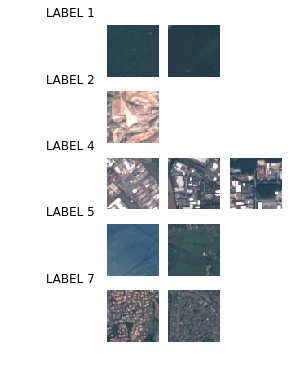

In [4]:
for imgs,labels in train_generator_fn():
    if np.random.random()>.1:
        break
reload(mlutils)        
mlutils.show_labeled_image_mosaic(imgs, labels)

In [14]:
from keras import optimizers
def get_conv_model_A(num_classes, img_size=64, compile=True):
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    print "using",num_classes,"classes"  
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(96,(11,11), activation="relu", padding="SAME")(inputs) #, padding="SAME"se debería usar padding por
    layers = tf.keras.layers.MaxPool2D(2,2)(layers)
    layers = tf.keras.layers.Conv2D(256,(5,5), activation="relu", padding="SAME")(layers)
    layers = tf.keras.layers.MaxPool2D(2,2)(layers)
    layers = tf.keras.layers.Conv2D(256,(3,3), activation="relu", padding="SAME")(layers)
    layers = tf.keras.layers.MaxPool2D(2,2)(layers)
    layers = tf.keras.layers.Conv2D(256,(5,5), activation="relu", padding="SAME")(layers)
    layers = tf.keras.layers.Conv2D(256,(5,5), activation="relu", padding="SAME")(layers)
    layers = tf.keras.layers.MaxPool2D(3,3)(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(64, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    layers = tf.keras.layers.Dense(128, activation=tf.nn.relu)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        #Optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.3, decay=0, nesterov=False)
        model.compile(optimizer='sgd',#'adam',#Optimizer,
                      loss='sparse_categorical_crossentropy',#tf.keras.losses.mean_squared_error,
                      metrics=['accuracy'])
    return model
num_classes = len(classdirs)
model = get_conv_model_A(num_classes, img_size=img_size)

using 10 classes


In [46]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history=model.fit_generator(
        train_generator_fn(),
        steps_per_epoch=1200//batch_size,
        epochs=3,
        validation_data=test_generator_fn(),
        validation_steps=1200//batch_size)

Found 18900 images belonging to 10 classes.
Found 8100 images belonging to 10 classes.
Epoch 1/3
120/120 [==============================] - 133s 1s/step - loss: 1.5408 - acc: 0.3925 - val_loss: 1.4098 - val_acc: 0.4383
Epoch 2/3
120/120 [==============================] - 144s 1s/step - loss: 1.4533 - acc: 0.4583 - val_loss: 1.6749 - val_acc: 0.3483
Epoch 3/3
120/120 [==============================] - 148s 1s/step - loss: 1.4750 - acc: 0.4583 - val_loss: 1.4164 - val_acc: 0.4400


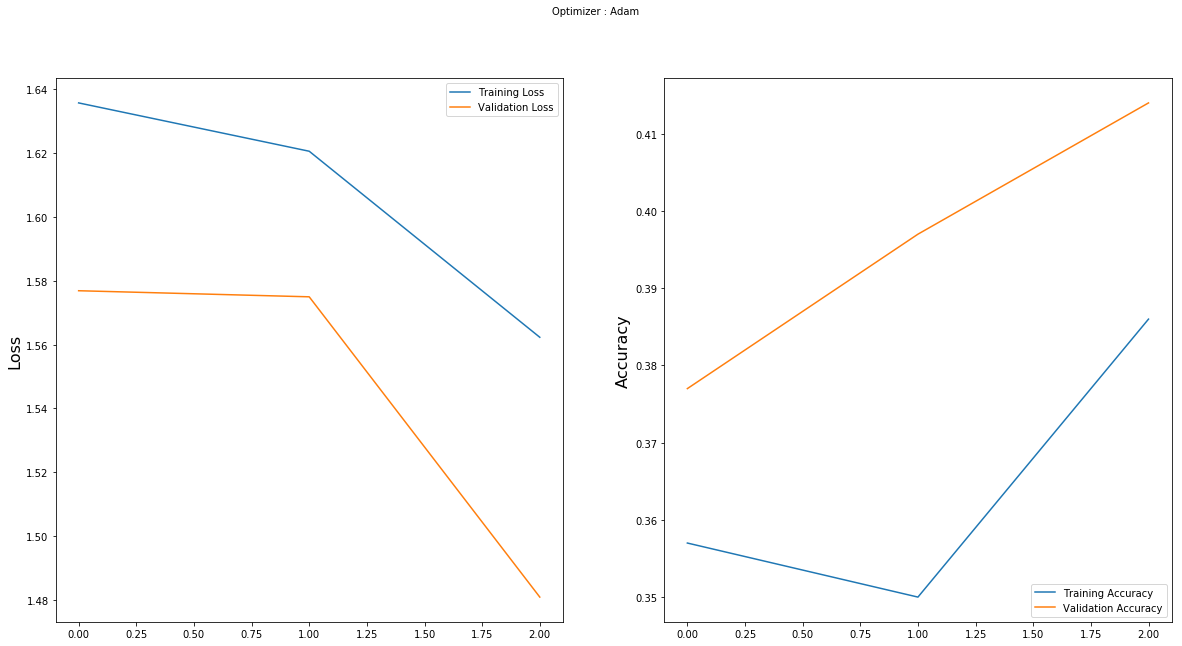

In [38]:
plotevol()

In [47]:
Y_pred = model.predict_generator(test_generator_fn(), 100)#8100 // batch_size+1)

y_pred = np.argmax(Y_pred, axis=1)

X_pred = model.predict_generator(train_generator_fn(), 100)#8100 // batch_size+1)

x_pred = np.argmax(X_pred, axis=1)

Found 8100 images belonging to 10 classes.
Found 18900 images belonging to 10 classes.


In [48]:
y_pred.shape

(1000,)

Confusion Matrix
[[0.031 0.003 0.004 0.032 0.013 0.008 0.034 0.057]
 [0.003 0.    0.    0.005 0.001 0.001 0.007 0.004]
 [0.    0.001 0.001 0.001 0.    0.    0.008 0.004]
 [0.03  0.004 0.002 0.023 0.008 0.012 0.04  0.053]
 [0.01  0.    0.001 0.012 0.007 0.003 0.014 0.021]
 [0.007 0.    0.    0.013 0.001 0.002 0.007 0.011]
 [0.039 0.001 0.002 0.033 0.007 0.004 0.051 0.071]
 [0.052 0.005 0.003 0.051 0.012 0.016 0.067 0.087]]
Classification Report
                      precision    recall  f1-score   support

          AnnualCrop       0.18      0.17      0.18       182
              Forest       0.00      0.00      0.00        21
HerbaceousVegetation       0.08      0.07      0.07        15
             Highway       0.14      0.13      0.13       172
          Industrial       0.14      0.10      0.12        68
             Pasture       0.04      0.05      0.05        41
       PermanentCrop       0.22      0.25      0.23       208
         Residential       0.28      0.30      0.29    

/opt/miniconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 8, does not match size of target_names, 10
  .format(len(labels), len(target_names))


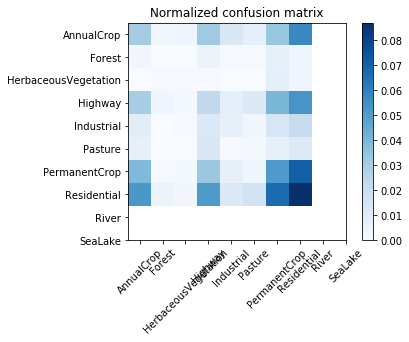

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

#print y_pred
print('Confusion Matrix')

cm= confusion_matrix(x_pred, y_pred)
from sklearn.metrics import confusion_matrix
from __future__ import division
import matplotlib.pyplot as plt
cm = cm/np.sum(cm)
print cm
cmap = plt.cm.Blues
tick_marks = np.arange(10)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xticks(tick_marks, classdirs, rotation=45)
plt.yticks(tick_marks, classdirs)
print('Classification Report')

#target_names = ['Cats', 'Dogs', 'Horse']

print(classification_report(x_pred, y_pred, target_names=classdirs))

In [ ]:
test_generator_fn.class_indices

Found 8100 images belonging to 10 classes.


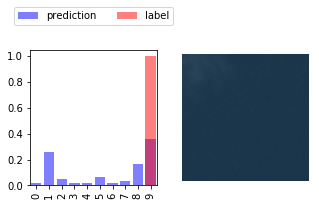

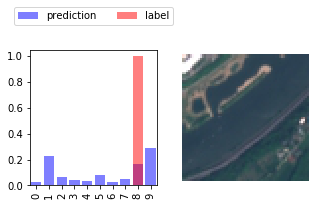

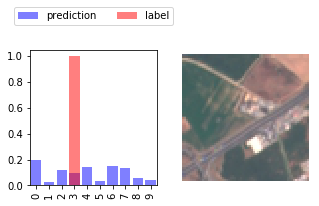

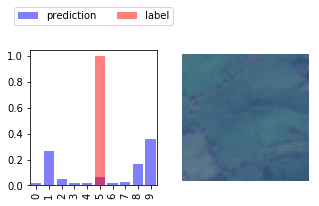

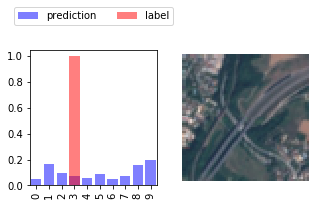

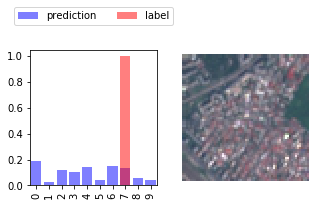

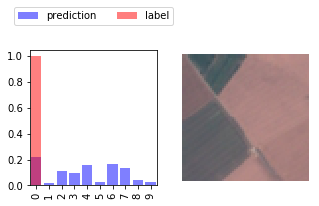

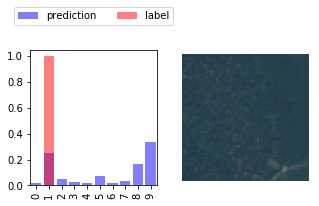

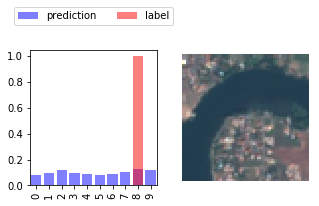

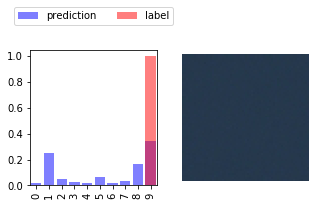

In [21]:
for x,y in test_generator_fn():
    if np.random.random()>.7:
        break
        
preds = model.predict(x)
mlutils.show_preds(x, y, preds)

In [22]:
!ls -lash data/alexnet_conv1_conv2.pklz

ls: cannot access 'data/alexnet_conv1_conv2.pklz': No such file or directory


In [ ]:
test_preds = model.predict(x).argmax(axis=1)
mlutils.plot_confusion_matrix(y, preds,classes=np.r_[0,1,2,3,4,5,6,7,8,9], normalize=True)

In [ ]:
orig=train(model, batch_size=16, epochs=15, model_name="LandCoverModel")

# Transfer the first layer weights of AlexNet

In [123]:
# Load the weights into memory
!mkdir Weights
!rm Weights/bvlc_alexnet.npy
!wget http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/bvlc_alexnet.npy -P Weights

mkdir: cannot create directory ‘Weights’: File exists
--2019-04-21 16:51:28--  http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/bvlc_alexnet.npy
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243861814 (233M)
Saving to: ‘Weights/bvlc_alexnet.npy’

bvlc_alexnet.npy    100%[===================>] 232.56M  1.10MB/s    in 3m 11s  

2019-04-21 16:54:40 (1.21 MB/s) - ‘Weights/bvlc_alexnet.npy’ saved [243861814/243861814]



In [9]:
weights_dict = np.load('Weights/bvlc_alexnet.npy', encoding='bytes').item()
for k,(w,b) in weights_dict.iteritems():
    print k, b.shape, w.shape

fc6 (4096,) (9216, 4096)
fc7 (4096,) (4096, 4096)
fc8 (1000,) (4096, 1000)
conv3 (384,) (3, 3, 256, 384)
conv2 (256,) (5, 5, 48, 256)
conv1 (96,) (11, 11, 3, 96)
conv5 (256,) (3, 3, 192, 256)
conv4 (384,) (3, 3, 192, 384)


(11, 11, 3, 96)


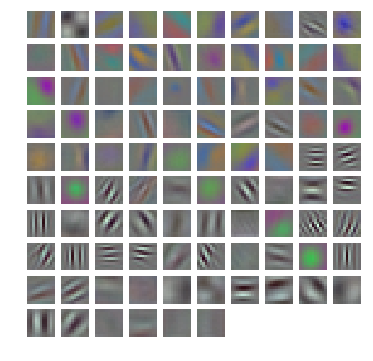

In [10]:
alex_w1 = weights_dict["conv1"][0]
alex_w1b = weights_dict["conv1"][1]
print alex_w1.shape
mlutils.display_imgs(alex_w1)

In [15]:
w = model.get_weights()
w[0] = alex_w1
w[1] = alex_w1b
model.set_weights(w)

In [16]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history =model.fit_generator(
    train_generator_fn(),
    steps_per_epoch=1000 // batch_size,
    epochs=3,
    validation_data=test_generator_fn(),
    validation_steps=400 // batch_size,
    callbacks=callbacks_list)

Found 18900 images belonging to 10 classes.
Found 8100 images belonging to 10 classes.
Epoch 1/3
 99/100 [============================>.] - ETA: 0s - loss: 2.1653 - acc: 0.1818
Epoch 00001: val_acc improved from -inf to 0.32750, saving model to model_weights.h5
100/100 [==============================] - 106s 1s/step - loss: 2.1645 - acc: 0.1820 - val_loss: 1.9605 - val_acc: 0.3275
Epoch 2/3
 99/100 [============================>.] - ETA: 0s - loss: 1.8999 - acc: 0.2768
Epoch 00002: val_acc did not improve from 0.32750
100/100 [==============================] - 101s 1s/step - loss: 1.8994 - acc: 0.2760 - val_loss: 1.7737 - val_acc: 0.2900
Epoch 3/3
 99/100 [============================>.] - ETA: 0s - loss: 1.7759 - acc: 0.3303
Epoch 00003: val_acc improved from 0.32750 to 0.35000, saving model to model_weights.h5
100/100 [==============================] - 98s 983ms/step - loss: 1.7725 - acc: 0.3300 - val_loss: 1.6396 - val_acc: 0.3500


## Image Oclusion

0 255 (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

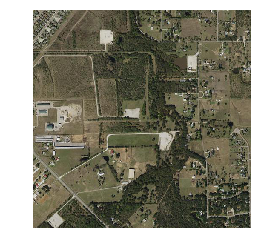

In [37]:
img = plt.imread("Example.jpg")
#aimg = plt.imread("Images/oboe.jpg")
print np.min(img), np.max(img), img.shape
plt.imshow(img)
plt.axis("off")

In [39]:
import mlutils
from numpy import array
predics=[]
w,h=64,64
for i in mlutils.pbar()(range(0,img.shape[0]-w,8)):
    for j in (range(0,img.shape[1]-h,8)):
        oimg = img.copy()
        pimg=oimg[i:i+h,j:j+w]#=np.max(oimg)
        pimg = np.expand_dims(pimg, axis=0)
        #pimg = inception_v3.preprocess_input(np.expand_dims(oimg.astype(float), axis=0))
        pred = model.predict(pimg)
        class_code = np.argsort(pred[0])[::-1][:1]
        predics=np.append(predics,class_code)

100% (56 of 56) |#########################| Elapsed Time: 0:02:06 Time: 0:02:06


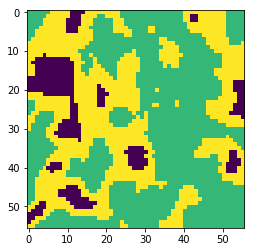

In [48]:
probs=predics.reshape(56,56)
plt.imshow(probs)

/opt/miniconda/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/miniconda/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(-0.5, 511.5, 511.5, -0.5)

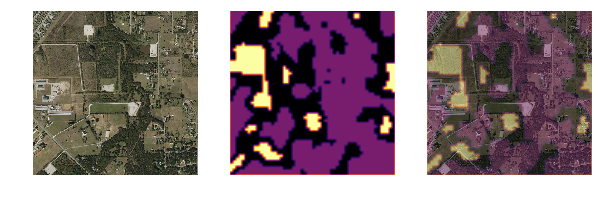

In [50]:
from skimage.transform import resize
new_prob=resize(probs, [512, 512])
plt.figure(figsize=(10,6))
plt.subplot(131); plt.imshow(img); plt.axis("off")
plt.subplot(132); plt.imshow(new_prob, cmap='inferno_r'); plt.axis("off")
plt.subplot(133); plt.imshow(img); plt.imshow(new_prob, cmap='inferno_r',alpha=0.4); plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

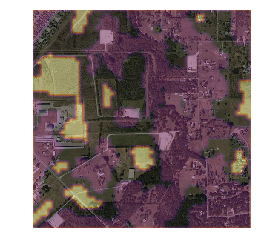

In [56]:
plt.imshow(img)
plt.imshow(new_prob, cmap='inferno_r',alpha=0.4); plt.axis("off")

## Pretrained model

In [ ]:
# Let's try the VGG16 model
pretrained_model = applications.VGG16(include_top=False, weights='imagenet')

In [51]:
from fastai.conv_learner import *
sz = 224
model = VVG16()
PATH = Path('ImgsSat/2750')
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(model, sz)) # creates a dropout of 0.5 (i.e. half the activations) on test dataset. 
	#tmfs = tfms_from_model(model, sz)
	# tells what size images should be, additional transformations such
	# image flips and zooms can easily be added here too

ImportError: No module named fastai.conv_learner

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
learn.fit(learning_rate=0.001, epochs=2)

In [52]:
from keras.applications import Xception
from keras.models import Sequential

In [53]:
model = Xception(weights='imagenet', include_top=False)
model.summary()

83697664/83683744 [==============================] - 422s 5us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________

In [68]:
datagen = ImageDataGenerator(rescale=1./255)

In [69]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [72]:
batch_size = 1
train_generator = datagen.flow_from_directory(
        traintest_imgs+"/train",  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size, # How many images do we need at a time
        class_mode=None, # Generator will yield data without labels
        shuffle= False) # Generator will read files in order

Found 18900 images belonging to 10 classes.


In [73]:
validation_generator = validation_datagen.flow_from_directory(
        traintest_imgs+"/test",  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size, # How many images do we need at a time
        class_mode=None,
        shuffle=False)

Found 8100 images belonging to 10 classes.


In [77]:
bottleneck_features_train = model.predict_generator(train_generator, 200, verbose = 1)

ValueError: Error when checking input: expected flatten_1_input to have shape (2, 2, 2048) but got array with shape (150, 150, 3)

In [55]:
import numpy as np
train_labels = np.array([0] * 100 + [1] * 100)

In [57]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
bottleneck_features_validation = model.predict_generator(test_generator_fn(), 20)

Found 8100 images belonging to 10 classes.


In [60]:
validation_labels = np.array([0] * 10 + [1] * 10)

In [61]:
model = Sequential()
model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [62]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
model.fit(bottleneck_features_train, train_labels,
          epochs=10,
          batch_size=32,
          validation_data=(bottleneck_features_validation, validation_labels))

ValueError: Input arrays should have the same number of samples as target arrays. Found 2000 input samples and 200 target samples.

In [79]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3)) #224

58900480/58889256 [==============================] - 432s 7us/step


In [96]:
#I shortlisted around 250 images for each class
train_dir = traintest_imgs+"/train"
validation_dir = traintest_imgs+"/test"
 
nTrain = 600
nVal = 150
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
#We are just loading the convolutional layers. It should be noted that the last layer has a shape of 7 x 7 x 512.
train_features = np.zeros(shape=(nTrain, 2, 2, 512)) #7
train_labels = np.zeros(shape=(nTrain,10)) #3
 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

Found 18900 images belonging to 10 classes.


In [ ]:
for inputs_batch, labels_batch in train_generator:
    print inputs_batch.shape, labels_batch.shape

In [99]:
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    #print features_batch.shape
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= 18900:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

ValueError: could not broadcast input array from shape (20,2,2,512) into shape (0,2,2,512)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) #3


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

In [ ]:
fnames = validation_generator.filenames
 
ground_truth = validation_generator.classes
 
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.iteritems())
 
predictions = model.predict_classes(validation_features)
prob = model.predict(validation_features)
 
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

In [6]:
# Instantiate convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(64, 64, 3))  # 3 = number of channels in RGB pictures

In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [ ]:
# Base variables
base_dir = traintest_imgs+"/train"
train_dir = os.path.join(base_dir, '/test')
validation_dir = os.path.join(base_dir, '/validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

train_size, validation_size, test_size = 200, 100, 100

img_width, img_height = 64, 64  #224 Default input size for VGG16

In [8]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
img_width=64
img_height=64
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(traintest_imgs+"/train", 18900)  # Agree with our small dataset size
#validation_features, validation_labels = extract_features(validation_dir, validation_size)
#test_features, test_labels = extract_features(test_dir, test_size)

Found 18900 images belonging to 10 classes.


ValueError: could not broadcast input array from shape (32,2,2,512) into shape (32,7,7,512)